In [29]:
import torch
import math

In [30]:
x = torch.linspace(-math.pi, math.pi, 2000, dtype = torch.float32, device = "cpu")
y = torch.sin(x)
print(x,y)

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416]) tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])


In [31]:
x_train = x.reshape(-1,1)
y_train = torch.reshape(y,(-1,1))
print(x_train.shape, x.shape)
print(y_train.shape, y.shape)

torch.Size([2000, 1]) torch.Size([2000])
torch.Size([2000, 1]) torch.Size([2000])


In [65]:
hidden_nodes = 5
class SimpleAnn(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.hiddenL = torch.nn.Linear(1,hidden_nodes)
        self.outputL = torch.nn.Linear(hidden_nodes,1)
    
    def forward(self,x):
        l1 = self.hiddenL(x)
        print("\n***Net Input of Hidden Layer****\n",l1)
        print("Size : ",l1.shape)
        h1 = torch.relu(l1)
        print("\n***Hidden Layer Output****\n",h1)
        print("Size : ",h1.shape)
        l2 = self.outputL(h1)
        print("\n\n***Predicted Value****\n",l2)
        print("Size : ",l2.shape)
        return l2
        
model = SimpleAnn()
print(model)

SimpleAnn(
  (hiddenL): Linear(in_features=1, out_features=5, bias=True)
  (outputL): Linear(in_features=5, out_features=1, bias=True)
)


In [66]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10e-2)
epochs = 1

In [71]:
for epoch in range(epochs):
    optimizer.zero_grad()    
    
    #Forward pass
    output = model(x_train)
    
    #Calculate the loss
    loss = criterion(y_train, output)
    print("Loss = ",loss)
    
    if epoch%50 == 0:
        print(f"Epoch : {epoch}, loss : {loss.item()}")
        
    print("\n*** Before backward Propogation***\n")
    print("\nHidden-weight\n",model.hiddenL.weight, "\nHidden-bias\n", model.hiddenL.bias)
    print("\nHidden-weight-grad\n",model.hiddenL.weight.grad, "\nHidden-bias-grad\n",model.hiddenL.bias.grad)
    print("\nOutput-weight\n",model.outputL.weight, "\Output-bias\n", model.outputL.bias)
    print("\nOutput-weight-grad\n",model.outputL.weight.grad, "\nOutput-bias-grad\n",model.outputL.bias.grad)

    #Backpropagate 
    loss.backward()
    
    print("\n*** After backward Propogation***\n")
    print("\nHidden-weight\n",model.hiddenL.weight, "\nHidden-bias\n", model.hiddenL.bias)
    print("\nHidden-weight-grad\n",model.hiddenL.weight.grad, "\nHidden-bias-grad\n",model.hiddenL.bias.grad)
    print("\nOutput-weight\n",model.outputL.weight, "\Output-bias\n", model.outputL.bias)
    print("\nOutput-weight-grad\n",model.outputL.weight.grad, "\nOutput-bias-grad\n",model.outputL.bias.grad)

    #Update weights
    optimizer.step()
    
    print("\n*** After changing weigths***\n")
    print("\nHidden-weight\n",model.hiddenL.weight, "\nHidden-bias\n", model.hiddenL.bias)
    print("\nHidden-weight-grad\n",model.hiddenL.weight.grad, "\nHidden-bias-grad\n",model.hiddenL.bias.grad)
    print("\nOutput-weight\n",model.outputL.weight, "\Output-bias\n", model.outputL.bias)
    print("\nOutput-weight-grad\n",model.outputL.weight.grad, "\nOutput-bias-grad\n",model.outputL.bias.grad)



***Net Input of Hidden Layer****
 tensor([[-1.5588, -2.5015, -0.9606,  2.6489,  3.7253],
        [-1.5572, -2.4988, -0.9604,  2.6461,  3.7222],
        [-1.5557, -2.4962, -0.9602,  2.6432,  3.7190],
        ...,
        [ 1.5411,  2.8723, -0.6396, -2.9686, -2.5156],
        [ 1.5427,  2.8750, -0.6395, -2.9714, -2.5187],
        [ 1.5442,  2.8777, -0.6393, -2.9743, -2.5218]],
       grad_fn=<AddmmBackward>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[0.0000, 0.0000, 0.0000, 2.6489, 3.7253],
        [0.0000, 0.0000, 0.0000, 2.6461, 3.7222],
        [0.0000, 0.0000, 0.0000, 2.6432, 3.7190],
        ...,
        [1.5411, 2.8723, 0.0000, 0.0000, 0.0000],
        [1.5427, 2.8750, 0.0000, 0.0000, 0.0000],
        [1.5442, 2.8777, 0.0000, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[-1.0620],
        [-1.0608],
        [-1.0596],
        ...,
        [ 0.6212],
        [ 0.6214],
        [ 0.6217]], grad_fn

In [73]:
torch.save(model,"D:\\python code\\pytorch_learn\\firstModel.pt")

In [100]:
model = torch.load("firstModel.pt")
model.eval()
ypred = model(torch.Tensor(x_train[300]))
print(type(x_train[300]), ypred, torch.sin(x_train[300]))


***Net Input of Hidden Layer****
 tensor([-1.0911, -1.6974, -0.9123,  1.8051,  2.7906], grad_fn=<AddBackward0>)
Size :  torch.Size([5])

***Hidden Layer Output****
 tensor([0.0000, 0.0000, 0.0000, 1.8051, 2.7906], grad_fn=<ReluBackward0>)
Size :  torch.Size([5])


***Predicted Value****
 tensor([-0.7110], grad_fn=<AddBackward0>)
Size :  torch.Size([1])
<class 'torch.Tensor'> tensor([-0.7110], grad_fn=<AddBackward0>) tensor([-0.8093])


In [98]:
model = torch.load("firstModel.pt")
model.eval()
ypred = model(x_train)
print(x[300], ypred, torch.sin(x[300]))


***Net Input of Hidden Layer****
 tensor([[-1.5553, -2.5070, -0.9606,  2.6489,  3.7268],
        [-1.5537, -2.5043, -0.9604,  2.6461,  3.7237],
        [-1.5522, -2.5016, -0.9602,  2.6433,  3.7206],
        ...,
        [ 1.5343,  2.8821, -0.6396, -2.9678, -2.5049],
        [ 1.5358,  2.8848, -0.6395, -2.9706, -2.5080],
        [ 1.5374,  2.8875, -0.6393, -2.9734, -2.5111]],
       grad_fn=<AddmmBackward>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[0.0000, 0.0000, 0.0000, 2.6489, 3.7268],
        [0.0000, 0.0000, 0.0000, 2.6461, 3.7237],
        [0.0000, 0.0000, 0.0000, 2.6433, 3.7206],
        ...,
        [1.5343, 2.8821, 0.0000, 0.0000, 0.0000],
        [1.5358, 2.8848, 0.0000, 0.0000, 0.0000],
        [1.5374, 2.8875, 0.0000, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[-1.0692],
        [-1.0680],
        [-1.0668],
        ...,
        [ 0.6810],
        [ 0.6813],
        [ 0.6816]], grad_fn


***Net Input of Hidden Layer****
 tensor([[-1.5553, -2.5070, -0.9606,  2.6489,  3.7268],
        [-1.5537, -2.5043, -0.9604,  2.6461,  3.7237],
        [-1.5522, -2.5016, -0.9602,  2.6433,  3.7206],
        ...,
        [ 1.5343,  2.8821, -0.6396, -2.9678, -2.5049],
        [ 1.5358,  2.8848, -0.6395, -2.9706, -2.5080],
        [ 1.5374,  2.8875, -0.6393, -2.9734, -2.5111]],
       grad_fn=<AddmmBackward>)
Size :  torch.Size([2000, 5])

***Hidden Layer Output****
 tensor([[0.0000, 0.0000, 0.0000, 2.6489, 3.7268],
        [0.0000, 0.0000, 0.0000, 2.6461, 3.7237],
        [0.0000, 0.0000, 0.0000, 2.6433, 3.7206],
        ...,
        [1.5343, 2.8821, 0.0000, 0.0000, 0.0000],
        [1.5358, 2.8848, 0.0000, 0.0000, 0.0000],
        [1.5374, 2.8875, 0.0000, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)
Size :  torch.Size([2000, 5])


***Predicted Value****
 tensor([[-1.0692],
        [-1.0680],
        [-1.0668],
        ...,
        [ 0.6810],
        [ 0.6813],
        [ 0.6816]], grad_fn

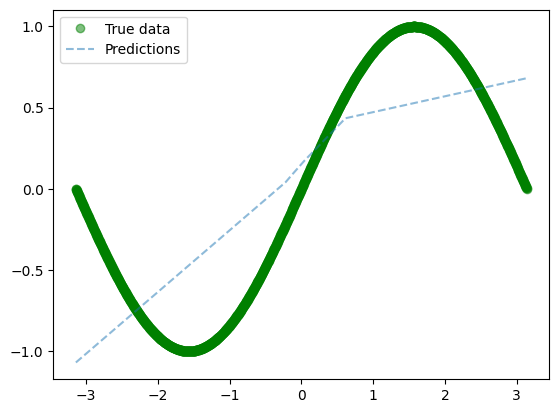

In [75]:
import matplotlib.pyplot as plt
predicted = model(x_train).data.numpy()
print(type(predicted))
print(predicted.shape, type(predicted))
    
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [13]:
hidden_nodes = 10
class SimpleAnn(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        self.hiddenL = torch.nn.Linear(1,hidden_nodes)
        self.linear2 = torch.nn.Linear(hidden_nodes,hidden_nodes)
        self.linear3 = torch.nn.Linear(hidden_nodes,1)
    
    def forward(self,x):
        l1 = self.linear1(x)
        h1 = torch.relu(l1)
        l2 = self.linear2(h1)
        obj_relu = torch.nn.ReLU()
        h2 = obj_relu(l2)
        h3 = self.linear3(h2)
        return h3
        
model = SimpleAnn()
print(model)

SimpleAnn(
  (hiddenL): Linear(in_features=1, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=1, bias=True)
)
